<a href="https://colab.research.google.com/github/SamG1002/PythonFiap/blob/main/checkpoint2_sem2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# checkpoint 2 - sem. 2

## Módulos

In [87]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# probabilidade
from scipy.stats import expon, norm, t, chi2, f

In [89]:
# amostragem
from sklearn.model_selection import train_test_split

## Dados

In [83]:
dados_atendimentos = pd.read_csv('dados_atendimentos.csv')

In [84]:
dados_atendimentos.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR"""
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT..."


In [85]:
dados_renda = pd.read_csv('dados_renda_municipios_2010.csv')

In [86]:
dados_renda.head()

,state,city,RDPC
0,GO,Abadia de Goiás/GO,574.96
1,MG,Abadia dos Dourados/MG,596.18
2,GO,Abadiânia/GO,519.87
3,PA,Abaetetuba/PA,293.01
4,MG,Abaeté/MG,707.24


## Funções

- Índice de Gini

Utilizar esta função para calcular o índice de gini para cada estado.

In [90]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    #array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [91]:
def formula_amostra_continua(N, S, Z, ME):
  n = (Z**2 * S**2 * N) / ((ME**2 * (N-1)) + (Z**2 * S**2))
  return int(n)

In [92]:
def formula_amostra_discreta(N, Z, ME):
  n = (Z**2 * 0.25 * N) / ((ME**2 * (N-1)) + (Z**2 * 0.25))
  return int(n)

## Questões

In [68]:
dados_renda.dtypes

state     object
city      object
RDPC     float64
dtype: object

**1 –Na tabela do censo de 2010, obter o índice de Gini por UF (state) (criar um dataframe como df_gini_estado).**

In [105]:
df_gini_estado = pd.DataFrame(dados_renda.groupby('state')['RDPC'].apply(gini)).reset_index()

**2–Realizar o join das tabelas de atendimento e df_gini_estado.**

In [110]:
df_gini_atendimentos = dados_atendimentos.set_index('state').join(df_gini_estado.set_index('state'), on='state', how='left')
df_gini_atendimentos = df_gini_atendimentos.reset_index()
df_gini_atendimentos.rename(columns={'RDPC':'GINI'}, inplace=True)

**3 –Obter as distribuições de probabilidade (histograma) das variáveis listadas, depois informar qual das distribuições de probabilidade estudadas é mais similar:**



a) TempoAcesso



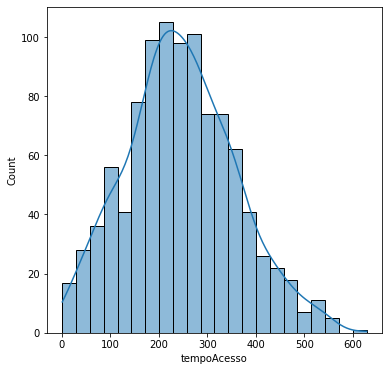

In [111]:
plt.figure(figsize=(6,6))
dfTempoAcesso = df_gini_atendimentos.groupby(['tempoAcesso'])['tempoAcesso'].count()
sns.histplot(data=df_gini_atendimentos, x='tempoAcesso', kde=True )

In [112]:
dfTempoAcesso = dfTempoAcesso.reset_index(name='count')

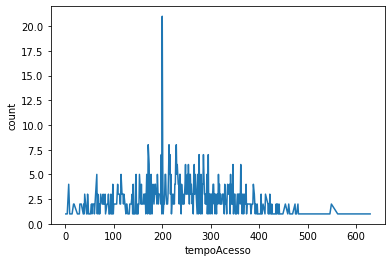

In [113]:
sns.lineplot(data=dfTempoAcesso, x='tempoAcesso', y='count')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f17bd049090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f17bd049b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f17bd044ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f17bd050610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f17bd050b50>],
 'means': []}

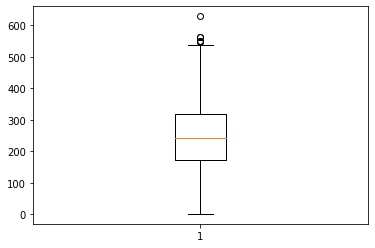

In [114]:
plt.boxplot(df_gini_atendimentos['tempoAcesso'])

b)Gini

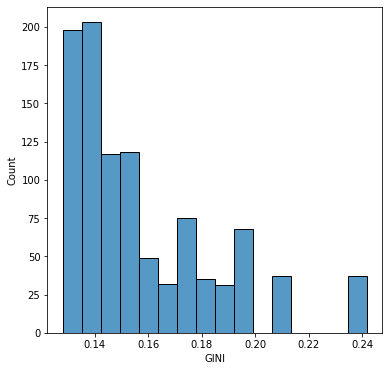

In [117]:
plt.figure(figsize=(6,6))
dfGINI = df_gini_atendimentos.groupby(['GINI'])['GINI'].count()
dfGINI = dfGINI.reset_index(name='count')

sns.histplot(data=df_gini_atendimentos, x='GINI' )

In [118]:
dfGINI.sort_values(by='count', ascending=False).head()

,GINI,count
16,0.160275,49
8,0.140590,47
4,0.134532,45
0,0.127922,43
15,0.154616,42


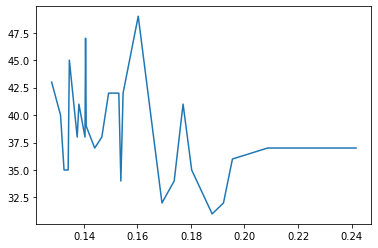

In [119]:
plt.plot(dfGINI['GINI'], dfGINI['count'])

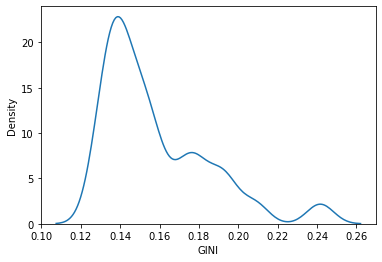

In [120]:
sns.kdeplot(data=df_gini_atendimentos, x='GINI')

**4 –Assumindo  que  TempoAcesso(em  segundos)e  Gini  tendem  a  seguir  uma  distribuição  de NORMAL. Obtenha as seguintes probabilidades:**

a) P(Tempo Acesso > 2 minutos)

In [122]:
tempoMedio = df_gini_atendimentos['tempoAcesso'].median()
tempoSTD = df_gini_atendimentos['tempoAcesso'].std()

In [123]:
p = norm.cdf(x=120, scale=tempoSTD, loc=tempoMedio)
p = p + 0.5
p

0.641621948805869

b) P(1,5 minutos> Tempo Acesso > 2 minutos)

In [125]:
P1 = norm.cdf(x = 90, scale = tempoSTD, loc = tempoMedio)
P2 = norm.cdf(x = 120, scale = tempoSTD, loc = tempoMedio)

abs(P2 - P1)

0.051354315095983205

c) P( Tempo Acesso < 0,5 minuto)

In [127]:
P = norm.cdf(x = 30, scale = tempoSTD, loc = tempoMedio)
1 - P

0.96934166145321

d) P(Gini > 20%)

In [128]:
giniMedia = df_gini_atendimentos['GINI'].median()
giniSTD = df_gini_atendimentos['GINI'].std()

In [129]:
p = norm.ppf(0.2, scale = giniSTD, loc = giniMedia)
1 - p

0.8736523087450412

e) P(10%> Gini > 15%)

In [130]:
P1 = norm.ppf(0.1, scale = giniSTD, loc = giniMedia)
P2 = norm.ppf(0.15, scale = giniSTD, loc = giniMedia)
abs(P2 - P1)

0.006656491700115771

f) P( Gini < 12%)

In [131]:
p = norm.ppf(0.12, scale = giniSTD, loc = giniMedia)
p

0.11729473113194328

**5 –Baseando-se na variável TempoAcesso, qual o tamanho de amostra para realizar um estudo com estes dados?Utilizar margem de erro de 15 segundos e nível de confiança de 95%.**

In [137]:
N = df_gini_atendimentos['tempoAcesso'].count()
Z = 1.96
ME = 0.015

In [138]:
n = formula_amostra_discreta(N, Z, ME)
n

810

**6 –Após obter o tamanho de amostra, gerar dois novos dataframesconforme o seguinte:**

a) Criar um dataframe chamado df_aas usando amostra aleatória simples.

In [139]:
#exemplo aleatorio dados_amostra_simples = dados_municipio.sample(n=n, random_state=1245)  
df_aas = df_gini_atendimentos.sample(n=n, random_state=1245)
df_aas.head()

,state,idEntrada,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,GINI
376,PR,377,0,40%,3,n/ avaliado,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:59,120,500,"""INTERNAL SERVER ERROR""",0.131235
761,PI,762,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:02,18/05/2021 18:02,314,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.149203
70,MG,71,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,181,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.192143
942,AM,943,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:56,38,500,"""INTERNAL SERVER ERROR""",0.180262
558,RO,559,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,216,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.127922


b) Criar  um  dataframe  chamado  df_aae  usando  amostra  aleatória  estratificada.  Utilizar como estrato a variável “avaliacao”.

In [142]:
df_aae = train_test_split(df_gini_atendimentos, test_size = n, 
              random_state=1245, stratify=df_gini_atendimentos['avaliacao'])[1]
df_aae.head()

,state,idEntrada,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,GINI
836,ES,837,0,40%,3,n/ avaliado,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:57,30,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.153020
354,RN,355,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:58,133,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.144012
904,SE,905,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:03,18/05/2021 18:02,370,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES""",0.140378
751,GO,752,1,80%,1,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 17:59,227,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.138104
743,MS,744,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 18:02,18/05/2021 18:00,320,500,"""INTERNAL SERVER ERROR""",0.134532


**7 –No dataframe df_aas realizar as seguintes análises:**

a) Comparar  as  medidas  descritivas  para  TempoAcesso  com  o  dataset  original.  Houve diferenças significativas?

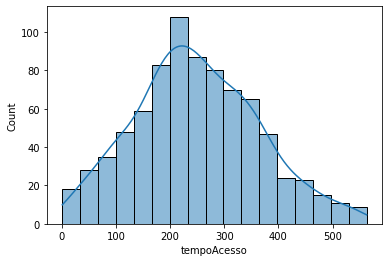

In [144]:
aas_tempo = df_aae.groupby(['tempoAcesso'])['tempoAcesso'].count()\
                  .reset_index(name='count')
sns.histplot(data=df_aas, x = 'tempoAcesso', kde=True)

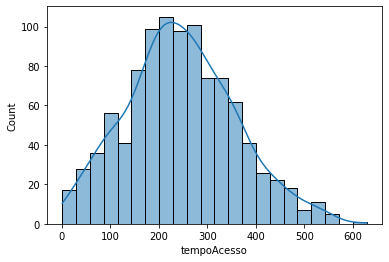

In [146]:
sns.histplot(data=df_gini_atendimentos, x = 'tempoAcesso', kde=True)



> **R: As medidadas de disperção entre os datasets seria a distancia de 10 e 30 dentre eles.**



b) Comparar  as  medidas  descritivas  para  Gini  com  o  dataset  original.  Houve  diferenças significativas?

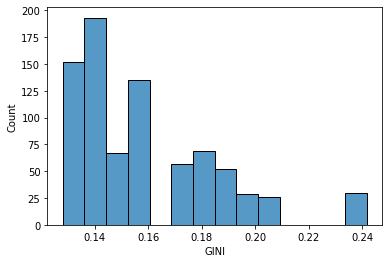

In [147]:
sns.histplot(data=df_aas, x='GINI')

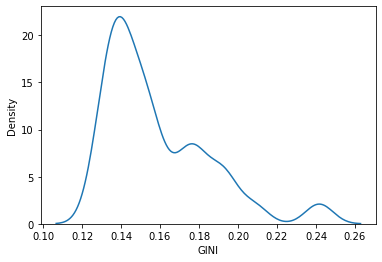

In [148]:
sns.kdeplot(data=df_aas, x='GINI')



> **R: Nada relevante suficiente para pontuar.**



c) Obter as proporções da variável “avaliacao” e compare com o dataset original.

In [150]:
df_gini_atendimentos.groupby('avaliacao')['avaliacao'].describe()

,count,unique,top,freq
avaliacao,,,,
n/ avaliado,239,1,n/ avaliado,239
negativa,510,1,negativa,510
positiva,251,1,positiva,251


In [151]:
df_aas.groupby('avaliacao')['avaliacao'].describe()

,count,unique,top,freq
avaliacao,,,,
n/ avaliado,189,1,n/ avaliado,189
negativa,413,1,negativa,413
positiva,208,1,positiva,208


d) Obter as medidas descritivas para TempoAcesso para cada perfil de “avaliacao” ecompare com o dataset original.

In [152]:
df_gini_atendimentos.groupby('avaliacao')['tempoAcesso'].describe()

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,239.0,238.472803,115.949525,1.0,158.5,234.0,309.50,629.0
negativa,510.0,246.870588,113.674072,4.0,168.0,243.5,330.75,549.0
positiva,251.0,252.876494,107.700718,7.0,189.0,251.0,308.00,562.0


In [153]:
df_aas.groupby('avaliacao')['tempoAcesso'].describe()

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,189.0,240.079365,116.703384,1.0,155.00,236.0,318.00,563.0
negativa,413.0,250.641646,115.327383,5.0,169.00,247.0,335.00,549.0
positiva,208.0,255.250000,111.385629,7.0,184.75,251.0,313.25,562.0


e)Obter as medidas descritivas para GINI para cada perfil de “avaliacao” ecompare com o dataset original.

In [155]:
df_gini_atendimentos.groupby('avaliacao')['GINI'].describe()

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,239.0,0.156475,0.024968,0.127922,0.138104,0.149203,0.173719,0.24169
negativa,510.0,0.158849,0.027977,0.127922,0.138104,0.149203,0.177035,0.24169
positiva,251.0,0.158473,0.027496,0.127922,0.138104,0.149203,0.173719,0.24169


In [156]:
df_aas.groupby('avaliacao')['GINI'].describe()

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,189.0,0.157026,0.025155,0.127922,0.138104,0.149203,0.173719,0.24169
negativa,413.0,0.159097,0.027717,0.127922,0.138104,0.149203,0.177035,0.24169
positiva,208.0,0.158720,0.027026,0.127922,0.138104,0.149203,0.173719,0.24169


**8 –No dataframe df_aae realizar as seguintes análises:**

a) Comparar  as  medidas  descritivas  para  TempoAcesso  com  o  dataset  original.  Houve diferenças significativas?

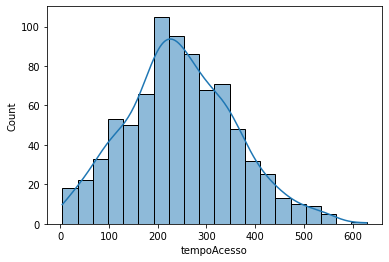

In [157]:
sns.histplot(data=df_aae, x='tempoAcesso', kde=True)

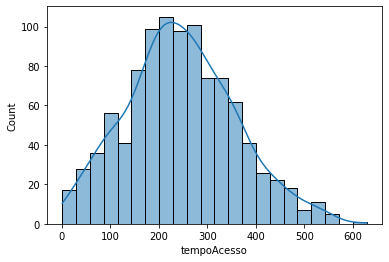

In [158]:
sns.histplot(data=df_gini_atendimentos, x='tempoAcesso', kde=True)



> **R: Foi avaliado um leve nivelamento nas médias do tempo de acesso.**



b) Comparar  as  medidas  descritivas  para  Gini  com  o  dataset  original.  Houve  diferenças significativas?

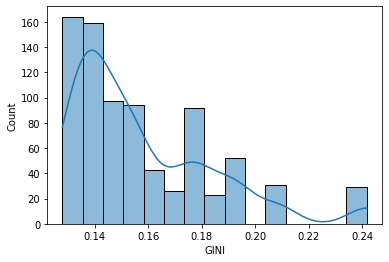

In [159]:
sns.histplot(data=df_aae, x='GINI', kde=True)

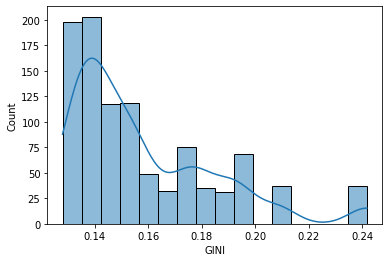

In [160]:
sns.histplot(data=df_gini_atendimentos, x='GINI', kde=True)



> **R: As diferenças apresentadas como ilustrado nos gráficos são de pequenas crescentes em alguns valores GINI**



c) Obter as proporções da variável “avaliacao” e compare com o dataset original.

In [161]:
df_gini_atendimentos.groupby('avaliacao')['avaliacao'].describe()

,count,unique,top,freq
avaliacao,,,,
n/ avaliado,239,1,n/ avaliado,239
negativa,510,1,negativa,510
positiva,251,1,positiva,251


In [162]:
df_aae.groupby('avaliacao')['avaliacao'].describe()

,count,unique,top,freq
avaliacao,,,,
n/ avaliado,194,1,n/ avaliado,194
negativa,413,1,negativa,413
positiva,203,1,positiva,203


d) Obter as medidas descritivas para TempoAcesso para cada perfil de “avaliacao” e compare com o dataset original.

In [163]:
df_aae.groupby('avaliacao')['avaliacao'].describe()

,count,unique,top,freq
avaliacao,,,,
n/ avaliado,194,1,n/ avaliado,194
negativa,413,1,negativa,413
positiva,203,1,positiva,203


In [164]:
df_aae.groupby('avaliacao')['tempoAcesso'].describe()

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,194.0,243.298969,114.575148,5.0,163.25,236.0,312.0,629.0
negativa,413.0,245.532688,114.317230,4.0,168.00,242.0,333.0,549.0
positiva,203.0,252.256158,102.724921,7.0,198.00,250.0,306.5,562.0


e) Obter as medidas descritivas para GINIpara cada perfil de “avaliacao” e compare com o dataset origina

In [166]:
df_gini_atendimentos.groupby('avaliacao')['GINI'].describe()

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,239.0,0.156475,0.024968,0.127922,0.138104,0.149203,0.173719,0.24169
negativa,510.0,0.158849,0.027977,0.127922,0.138104,0.149203,0.177035,0.24169
positiva,251.0,0.158473,0.027496,0.127922,0.138104,0.149203,0.173719,0.24169


In [167]:
df_aae.groupby('avaliacao')['GINI'].describe()

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,194.0,0.156824,0.025307,0.127922,0.138104,0.149203,0.173719,0.24169
negativa,413.0,0.158502,0.027570,0.127922,0.138104,0.149203,0.177035,0.24169
positiva,203.0,0.158163,0.027336,0.127922,0.137464,0.149203,0.175377,0.24169
